<a href="https://colab.research.google.com/github/Sourav-95/EDA_with_python/blob/main/Austo_Car_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='black'>
<font size=5>
Business Statement 
<font color='blue'>
<br>
<font size=4>
Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign. We have to dig insight from the dataset and pull out trend and pattern that benefit the marketing team to improve the campaign
</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libuaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
austo = pd.read_csv('/content/drive/MyDrive/Projects/02 SMDM Project/austo_automobile.csv')

<font color ='black'>
<font size=4>
Information about the dataset
</font>

In [4]:
#dimension of the dataset
print ("The No. of Customers in the dataset are:",austo.shape[0], "\nThe Total features available for each Customers are:" ,austo.shape[1])

The No. of Customers in the dataset are: 1581 
The Total features available for each Customers are: 14


In [5]:
#information on the dataset
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


<font color='Red'>
<font size=4>
Observation
<font color='black'>
<font size=2>
<br>
1. There are 1581 Rows & 14 Columns in the Dataset
<br>2. There are 8 Object type data, 5 integer type Data & 1 Float type dataThere are 8 Object type data, 5 integer type Data & 1 Float type data
<br>3. There are some null vales in the Column Gender
<br>4. Some of the Partner are not working hence Partner_salary has null values which are needed to be checked & treated

<font color='blue'>
    <font size=5>
        -> Preliminary Analysis of the Data, Consistency of the Variables, Checking of discrepancies in the data
    </font>

In [6]:
#summary of the dataset
austo.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [7]:
#Finding the null values in the dataset
austo.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

*Gender & Partner_salary has bad data, hence both needed to be checked & treated. We also hae to check the anomalies of the dataset*

In [8]:
#viewing the values in the column Gender
austo.Gender.unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [9]:
#replacing the wring entries
austo['Gender'].replace('Femal', 'Female', inplace=True)
austo['Gender'].replace('Femle', 'Female', inplace=True)

In [10]:
#checking the description of the Gender Feature
austo.Gender.describe()

count     1528
unique       2
top       Male
freq      1199
Name: Gender, dtype: object

Male are frequently occuring. Hence we can impute the Null values of Gender with Male

In [11]:
austo['Gender'].fillna('Male', inplace=True)

In [12]:
#rechecking the variable after treating the bad data
austo.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [13]:
#checking the unique entries of partner_salary to check if there is any anomalies in the dataset of partner_salary
austo.Partner_salary.unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000.,    nan, 40500., 50400.,
       80400., 60900., 60100., 70200., 30000., 40300., 40800., 70800.,
         900., 45000., 40600., 50700., 80500., 27700., 35800., 26600.,
       60000., 27900., 60800., 40000., 70100., 38100., 38200., 30200.,
       38500., 50900., 35100., 38700., 38300., 38900., 23200., 24700.,
       30800., 28100., 38400., 38000., 23100., 30100., 25700., 70400.,
         200., 30900., 26100., 45700.,   400., 28200., 70900., 38800.,
       45200., 26800., 60400., 30300., 25800.,   800., 38600., 24500.,
       30700., 28500., 24900., 70500., 35900., 30500., 28900., 27200.,
       45900., 25300., 35600., 25000., 25200., 26300., 35700., 23800.,
       32700., 30600., 45600., 28000., 32600., 28600., 25100., 26700.,
       24200., 25900., 22100., 25400., 28400., 28300., 25500., 24000.,
      

Some of the entries Partner_salary are Null, but logically if Partner is not working then Partner_salary can be 0 but if the Partner is working then partner_salary cannot be Null. Hence we have to impute with *Total_salary - Salary*

In [14]:
#treating the bad data in Partner_salary
for i in austo['Partner_working']:
    if i == 'Yes':
        austo['Partner_salary']=austo['Total_salary']-austo['Salary']
    elif i=='No':
        austo['Partner_salary']=austo['Partner_salary'].replace(np.nan,0)

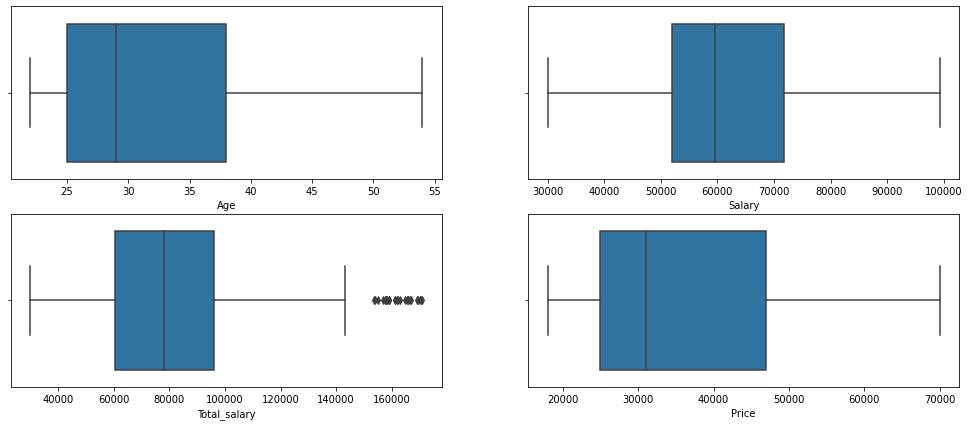

In [15]:
#Outlier checking for some features of the dataset
plt.figure(figsize=(17,7))
plt.subplot(221)
sns.boxplot(data=austo, x='Age')

plt.subplot(222)
sns.boxplot(data=austo, x='Salary')

plt.subplot(223)
sns.boxplot(data=austo, x='Total_salary')

plt.subplot(224)
sns.boxplot(data=austo, x='Price')

There are no such outlier present in Age, Salary & Price attribute of the dataset. But Partner_salary may create imbalance in the dataset which resulted in outlier in Total_salary

<font color='blue'>
<font size=5>
    -> Visualization of all the features of the data
<font color='black'>
<font size=4>
<br>
  --> Univariate Analysis

In [16]:
austo.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

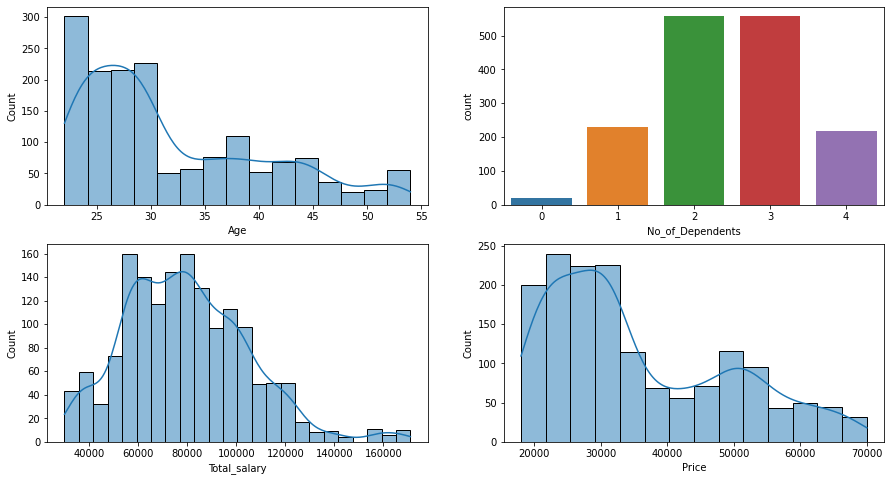

In [17]:
#distribution plot of the feature: Age, No_of_Dependents, Total_salary, price
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(15,8))
sns.histplot(data=austo, x='Age', kde=True, ax=axes[0][0])
sns.countplot(data=austo, x='No_of_Dependents', ax=axes[0][1])
sns.histplot(data=austo, x='Total_salary', kde=True, ax=axes[1][0])
sns.histplot(data=austo, x='Price', kde=True, ax=axes[1][1])
plt.show()

<font color='Red'>
<font size=4>
Observations:
</>

*   Age of the Customer Ranges from minimum of 22 Years to Maximum of 54 Years
*   Age is highly Right skewed. From the plot, most of the customers are between 22 to 30 years of age
*   75% of the data has 2-3 No_of_Dependents
*   Total_Salaries Ranges from 30000 to 171000 with a mean of 79625.99 and have a uniform distribution
*   Partner's Salary is highly negatively skewed with a mean value of 19233.77
*   Total Salary has almost normal distribution in the dataset but contains multiple outliers which implies there are some customers whose total income is excessively high
*   Price Range of Austo Car's is left skewed  with no outliers which implies Most of the customers prefers to buy Car within a budget of 35000

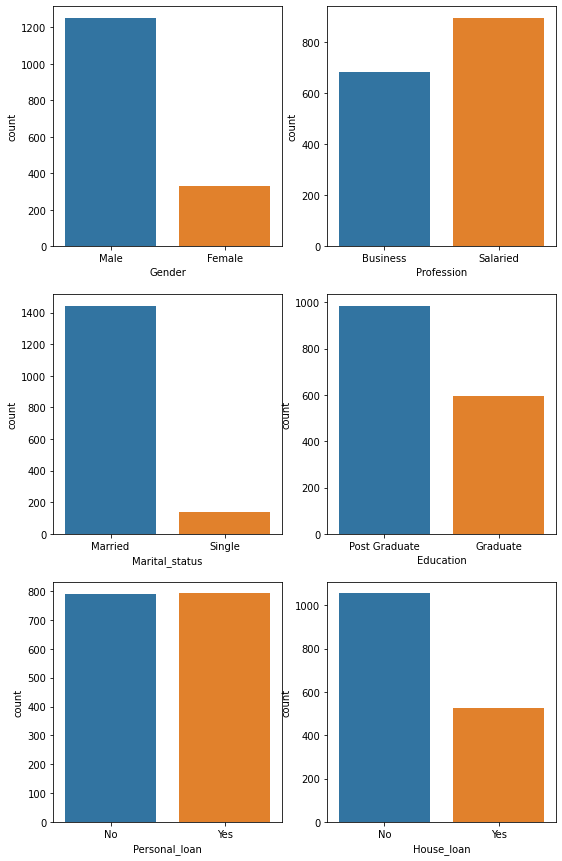

In [18]:
fig, axes=plt.subplots(nrows=3, ncols=2, figsize=(9,15))
sns.countplot(data=austo, x='Gender', ax=axes[0][0])
sns.countplot(data=austo, x='Profession', ax=axes[0][1])
sns.countplot(data=austo, x='Marital_status', ax=axes[1][0])
sns.countplot(data=austo, x='Education', ax=axes[1][1])
sns.countplot(data=austo, x='Personal_loan', ax=axes[2][0])
sns.countplot(data=austo, x='House_loan', ax=axes[2][1])
plt.show()

<font color='red'>
<font size=4>
Observations:
</>

*   Most of the customer counts are Male.
*   Salaried person are more purchasing the car than a Business Man
*   Married Peoples contributes most in number of purchasing than Singles
*   Most of the Customers of Austo Motor Company are Post Graduated
*   Customers with Personal Loan & without Personal Loan are almost same.
*   Whereas Customers without House_loan are maximum when compared to those who have House_loan

<font color='blue'>
<font size=5>
-> Understanding the relationship between all the features of the data

<font color='Black'>
<font size=4>
Bivariate Analysis

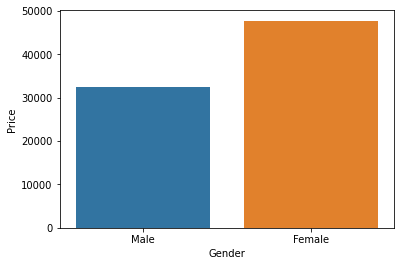

In [19]:
sns.barplot(x='Gender', y='Price', ci=None, data=austo);

*  Females have contributed more Average Revenue than Males

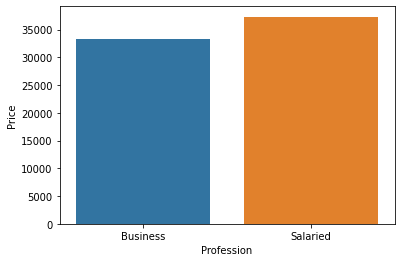

In [20]:
sns.barplot(x='Profession', y='Price', ci=None, data=austo);

In [21]:
pd.crosstab( austo.Make, austo.Profession, values=austo.Price, aggfunc=np.mean,  normalize='all',margins=True)

Profession,Business,Salaried,All
Make,,,
Hatchback,0.112502,0.113928,0.226463
SUV,0.241119,0.237717,0.477531
Sedan,0.142551,0.152184,0.296006
All,0.471979,0.528021,1.000000


- Salaried Professionals has slight high purchasing pattern of Austo Car than Business Professionals
- 47% of all Professions prefers SUV

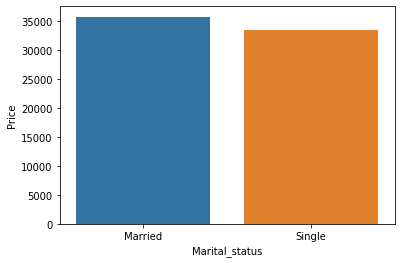

In [22]:
sns.barplot(x='Marital_status', y='Price', ci=None, data=austo);

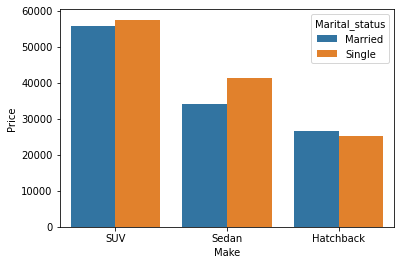

In [23]:
sns.barplot(x='Make', y='Price', hue='Marital_status', ci=None, data=austo);

- Although Non Married counts are much lower compared to the Married persons but Average Purchase price are just slightly different. Hence, Single's are buying high ticket value Austo Car than Married Person, among which SUV is the most preferred followed by Sedan

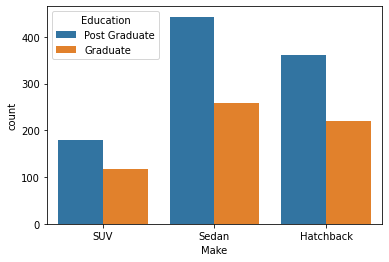

In [24]:
sns.countplot(x='Make', hue='Education', data=austo);

- Sedan are purchased by most numbers of the Post Graduates.

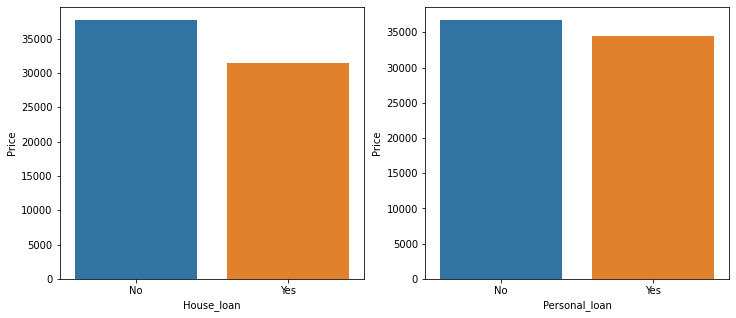

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='House_loan', y='Price', ci=None, data=austo);
plt.subplot(1,2,2)
sns.barplot(x='Personal_loan', y='Price', ci=None, data=austo);
plt.show()

- Clearly, customers who does not have House Loans or Personal loans have a higher purchase pattern.

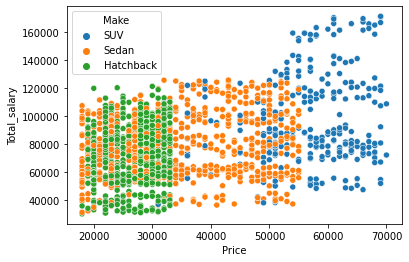

In [26]:
sns.scatterplot(x='Price', y='Total_salary', hue='Make', data=austo);

- There is not much trend between Salary and purchase type of Austo Cars, but SUV are bought by people of High Salary as it it the costlier in three segments of the car

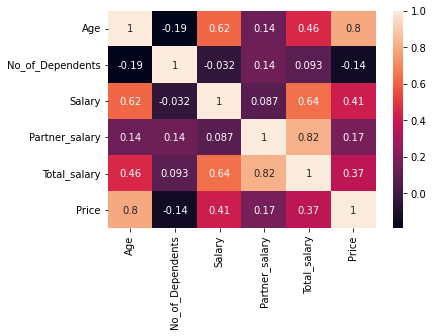

In [27]:
#heatmap to corelate the features providing the informations
sns.heatmap(austo.corr(), annot=True);

- Total Salary & partner_salary have a high co relation of *0.82* which is very common with the logic as the partner_salary increases the Total_salary increases
- Age & Price also has a high corelation of *0.8* which means elder peoples has a pattern of buying high value cars. Hence, the Age of a person has a good impact in the preference of cars.
- Age & Salary has a good positive Correlation, which means as the Age increases as the Age increases, salary increases hence they go for costlier brand.

<font color='blue'>
<font size=5>
-> Justification on the given previous observation

<font size=4>
<font color='red'>
1. Steve Roger says “Men prefer SUV by a large margin, compared to the women”

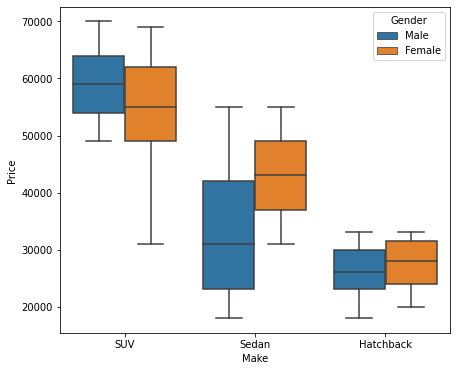

In [28]:
#box plot to check the distribution of different Make of the car w.r.t Gender
plt.figure(figsize=(7,6))
sns.boxplot(x='Make', y='Price', hue='Gender', data=austo);

In [29]:
pd.pivot_table(austo,'Price', index=['Make'], columns=[ 'Gender'], aggfunc=len, margins=True)

Gender,Female,Male,All
Make,,,
Hatchback,15,567,582
SUV,173,124,297
Sedan,141,561,702
All,329,1252,1581


- Clearly, analyzing the purchase pattern of both Gender, trend of purchasing SUV for females are more than Males with flexible budget which means they also buys lower models of SUV, whereas compared to Males they prefers to purchase medium of high models
- Most of the Men has a pattern to purchase either Sedan or Hatchback also Age being the factor since SUV is high budget and targeted by only peoples with higher salary & older, whereas Females doesn't prefers to purchase Hatchback
<font color='black'>
<font size=5>
<br>
Hence statement made by Steven Roger is incorrect

<font color='red'>
<font size=4>
<br>
2. Ned Stark believes that a salaried person is more likely to buy a Sedan.

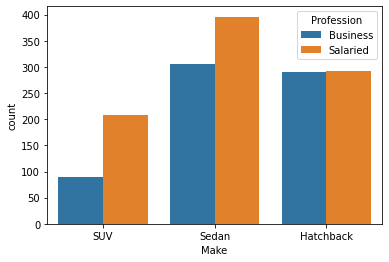

In [30]:
sns.countplot(x='Make', hue='Profession', data=austo);

In [31]:
pd.crosstab(austo.Make, austo.Profession, values=austo.Price, aggfunc=np.sum, normalize='all')

Profession,Business,Salaried
Make,,
Hatchback,0.135554,0.138220
SUV,0.089161,0.205437
Sedan,0.181237,0.250391


- Salaried Professionals are most when comes to buying a Sedan.
- 25% of total sales is from Sedan by Salaried professional
<font color='black'>
<font size=5>
<br>Hence Statement made by Ned Stark is correct

<font color='red'>
<font size=4>
3. Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale

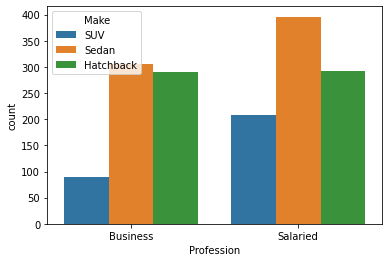

In [32]:
sns.countplot(x='Profession', hue='Make', data=austo);

In [33]:
austo.groupby('Gender')['Profession'].value_counts()

Gender  Profession
Female  Salaried      224
        Business      105
Male    Salaried      672
        Business      580
Name: Profession, dtype: int64

In [34]:
pd.pivot_table(austo,'Price', index=['Make', 'Gender'], columns=[ 'Profession'], aggfunc=len, margins=True)

Profession        Business  Salaried   All
Make      Gender                          
Hatchback Female       NaN      15.0    15
          Male       290.0     277.0   567
SUV       Female      55.0     118.0   173
          Male        34.0      90.0   124
Sedan     Female      50.0      91.0   141
          Male       256.0     305.0   561
All                  685.0     896.0  1581

-  Total Count of Salaried Male are - 672
-  Ratio of Hatchback purchased by Salaried men - 277/672 = 0.41
-  Ratio of SUV purchased by Salaried men - 90/672 = 0.13
-  Ratio of Sedan purchased by Salaried men - 305/672 = 0.45

Salaried person are the most in number who purchases Austo Car from the Barplot but when we tried to derive some more insights from the charts, we found that Ratio of Sedan purchased by Salaried men are most. 
<font color='black'>
<font size=5>
<br>
Hence above statement is correct

<font color='blue'>
<font size=5>
-> Amount spent on purchasing automobiles across the following categories. 

<font color='black'>
<font size=4>
-->  Amount  Spent on purchasing automobiles by GENDER

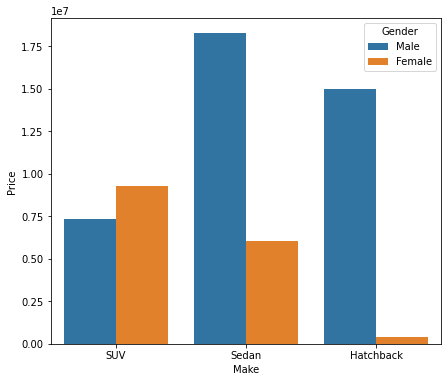

In [35]:
plt.figure(figsize=(7,6))
sns.barplot(x='Make', y='Price', hue='Gender', estimator=np.sum, ci=None, data=austo);

In [36]:
pd.crosstab (austo.Make, austo.Gender, values=austo.Price, aggfunc=np.mean, normalize='all', margins=True)

Gender,Female,Male,All
Make,,,
Hatchback,0.113585,0.109373,0.226463
SUV,0.221160,0.244388,0.477531
Sedan,0.176883,0.134610,0.296006
All,0.595412,0.404588,1.000000


- 59.5% Revenue of the Austo Car Company came from Females
- Women prefers purchasing High End models of car
- Although Mens contributed 24.4% of Revenue by purchasing SUV but they are the primary customer of low end cars

<font color='black'>
<font size=4>
--> How does peoples with Personal Loan impact the Sale of Automobile?

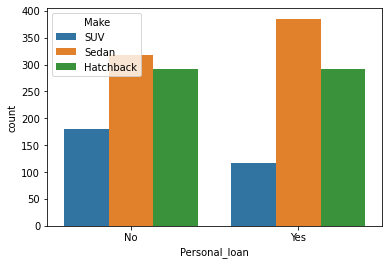

In [43]:
sns.countplot(x='Personal_loan', hue='Make', data=austo)

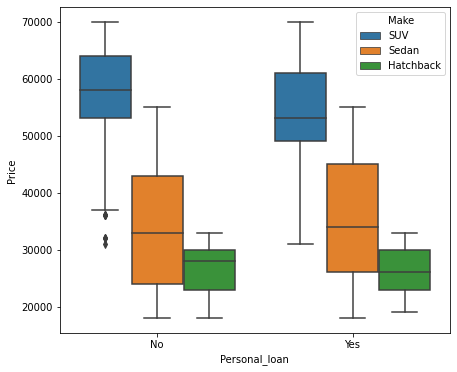

In [37]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Personal_loan', y='Price', hue='Make', data=austo);

In [41]:
pd.pivot_table(austo.Make, austo.Personal_loan, values=austo.Price, aggfunc=np.sum, normalize='all', margins=True)

Personal_loan,No,Yes,All
Make,,,
Hatchback,0.137971,0.135803,0.273774
SUV,0.184311,0.110288,0.294598
Sedan,0.192822,0.238806,0.431628
All,0.515103,0.484897,1.000000


<font color='red'>
<font size=5>
Observation:
<font color='black'>
<font size=3>
<br>
1. Although there are almost equal no of customers with or without Personal_loan but it has an impact on the sales & purchase pattern.
<br>
2. Customers with personal loan has a pattern of purchasing SUV. This can also be the fact that they generally took a personal loan to purchase SEDAN
3. Customers with Personal Loan prefers to buy Sedan or Hatchback but when incase of SUV they generally has a pattern of purchasing low end models.

<font color='blue'>
<font size=5>
--> Working Partner leads to the purchase of High Price Cars

In [44]:
#count the no of partner_working
austo.Partner_working.value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [55]:
pd.DataFrame(austo.groupby('Partner_working')['Make'].value_counts(normalize=True))

Make
Partner_working Make               
No              Sedan      0.403927
                Hatchback  0.394109
                SUV        0.201964
Yes             Sedan      0.476959
                Hatchback  0.346774
                SUV        0.176267

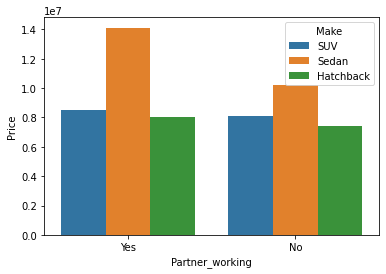

In [63]:
sns.barplot(x='Partner_working', y='Price', hue='Make', estimator=np.sum, ci=None, data=austo);

- Purchase pattern of High priced Car does not, depend on the parameter of Partner_working.
- 47% of the Customers whose partners are working purchased Sedan followed by 34% of same category purchased Hatchback
- Whereas same trend is noticed for the Customers whose partner are not working. Almost 40% of Sedan & 40% of Hatchback are purchased by the customers whose partner are not working.

- HENCE WORKING PARTNER DOES NOT LEAD TO CHANGE IN PURCHASE PATTERN.

<font color='blue'>
<font size=5>
The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [58]:
pd.DataFrame(austo.groupby(['Gender', 'Marital_status', 'Make']).Price.sum())

Price
Gender Marital_status Make               
Female Married        Hatchback    392000
                      SUV         8849000
                      Sedan       5470000
       Single         Hatchback     20000
                      SUV          403000
                      Sedan        561000
Male   Married        Hatchback  12886000
                      SUV         6810000
                      Sedan      17253000
       Single         Hatchback   2110000
                      SUV          518000
                      Sedan       1008000

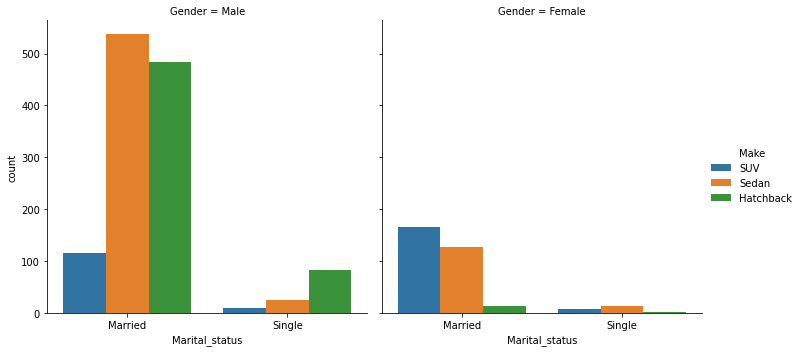

In [56]:
G1 = sns.catplot(x="Marital_status", hue="Make", col="Gender", data=austo, kind="count");

- Married Males are the prime customers of the company who majorly contributes in Revenue Generation by purchasing Sedan followed by Hatch Back
- Married Women have a tendency to buy SUV followed by Sedan
- Non Married Men have a potential users of Hatchback and buys this segment of the car other than any other segment
- Non Married Women usually buys Sedan, followed by SUV and very few have buyed the  Hatchback Car

<font color='Green'>
<font size=7>
Thank You
</font>